# NLP Sentiment Analysis - Step 2: Baseline model with TF-IDF + Logistic Regression
This notebook develops a **baseline sentiment classifier** on the IMDb reviews dataset.
<br>**TF-IDF features** and **Logistic Regression classifier* are used to establish a benchmark before moving to more deep learning and transformer based models.

## 1. Imports
Import required libraries for vectorisation, modelling and evaluation.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## 2. Load Data
Previously saved the IMDb dataset into CSV files after splitting them into **train / validation / test** sets. 
<br>Now it will be loaded for feature engineering and model training.
- 'train.csv' is used fo fitting the model
- 'valid.csv' is used for tuning/evaluating during development
- 'test.csv' is the final unseen evaluation to simulate real world performance

In [2]:
train_df = pd.read_csv("../data/processed/train.csv")
valid_df = pd.read_csv("../data/processed/valid.csv")
test_df  = pd.read_csv("../data/processed/test.csv")

print("Train:", train_df.shape)
print("Valid:", valid_df.shape)
print("Test :", test_df.shape)

Train: (20000, 3)
Valid: (5000, 2)
Test : (25000, 2)


## 3. TF-IDF Vectorisation
Raw text cannot be directly fed into traditional machine learning models.
<br>Therefore, **TF-IDF (term frequency - Inverse Document Frequency)** is used to convert text into numerical vectors:

- Captures how important a word is within a review, relative to the dataset.
- Ignores overly common words such as "the" and "and".
- Supports **n-grams** (using unigrams and bigrams) to capture short phrases.


In [3]:
vectoriser = TfidfVectorizer(max_features=20000, ngram_range=(1,2))

x_train = vectoriser.fit_transform(train_df["text"])
x_valid = vectoriser.transform(valid_df["text"])
x_test  = vectoriser.transform(test_df["text"])

y_train = train_df["label"]
y_valid = valid_df["label"]
y_test  = test_df["label"]

print("Vectorised shape:", x_train.shape)

Vectorised shape: (20000, 20000)


## 4. Train Baseline Model (Logistic Regression)
We train a **Logistic Regression classifier**, which is a strong baseline for text classification:

- Fast to train on TF–IDF features.  
- Surprisingly competitive with deep learning models on sentiment tasks.  
- Provides a good benchmark before moving on to Transformers.

In [4]:
clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


## 5. Evaluate on Validation Set
Checking how well the model generalises to unseen validation data.
<br>Validation prevents overfitting - we tune and make decisions based on validation, not test, to keep the test set truly 'unseen'.

- **Accuracy** -> proportion of correctly predicted reviews.
- **Classification Report** -> precision, recall, and F1-score for each class.

In [5]:
y_pred = clf.predict(x_valid)
print("Validation Accuracy:", accuracy_score(y_valid, y_pred))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

Validation Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2500
           1       0.88      0.90      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## 5a. Confusion Matrix (Validation Set)
The confusion matrix gives a deeper insight into the **types of errors**:

- Top left = True positive, correctly predicted positive
- Bottom Left = False negative, incorrectly predicted negative
- Top right = False positive, incorrectly predicted positive
- Bottom right = True negative, correctly predicted negative

This shows whether the model is biased towards one class or struggles equally across both.

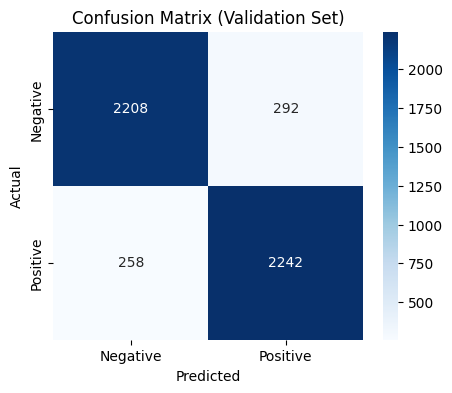

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

## 6. Final Test Evaluation
Now the **holdout test set** is used for final evaluation.

- Test results simulate real world deployment performance.
- Expecting similar accuracy to the validation set if the model generalises well.

This is the number we would report in a paper or portfolio summary.

In [7]:
y_test_pred = clf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.89176

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     12500
           1       0.89      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



## 6a. Confusion Matrix (Test set)

Plotting another confusion matrix but this time on the test set to visually confirm performance.
<br>If the heatmap is strongly diagonal, the classifier is doing well.
<br>If there is an imbalance, it would mean that the model has trouble wit certain types of reviews (e.g. sarcasm invovled could be hard to identify).

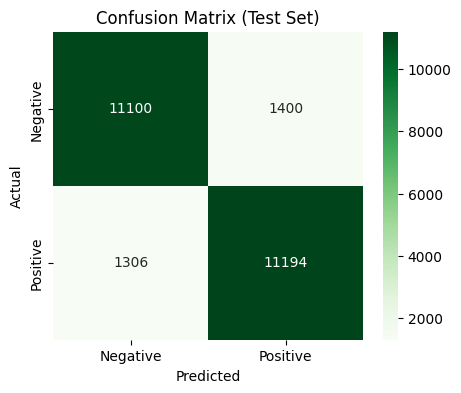

In [8]:
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()